In [ ]:
% cd /content/drive/MyDrive/DAUGXray/

/content/drive/MyDrive/DAUGXray


In [ ]:
import os
import shutil 

import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
MASK_FOLDER = "/content/drive/MyDrive/DAUGXray/DataAug/yolact_train/"
IMAGE_FOLDER = "/content/drive/MyDrive/DAUGXray/DataAug/mura/NEW_MURA_dataset/train/"
OUTPUT_FOLDER = "/content/drive/MyDrive/DAUGXray/DataAug/clahe_train/"

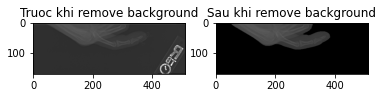

{0, 1}
{0, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96}


In [ ]:
mask_path = os.listdir(MASK_FOLDER)[0]
mask = cv2.imread(os.path.join(MASK_FOLDER,mask_path))
ret, mask_binary = cv2.threshold(mask,127,1,cv2.THRESH_BINARY)

image = cv2.imread(os.path.join(IMAGE_FOLDER, mask_path[:-3]+"png"))


output = image * mask_binary

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.figure = (10, 10)
ax1.imshow(image)
ax1.set_title("Truoc khi remove background")
ax2.imshow(output)
ax2.set_title("Sau khi remove background")

plt.show() 

shape = list(mask_binary.shape)
val = []
for x in list(mask_binary.reshape(shape[0]*shape[1]*shape[2], 1)):
  val.append(*x)
print(set(val)) 

shape = list(output.shape)
val = []
for x in list(output.reshape(shape[0]*shape[1]*shape[2], 1)):
  val.append(*x)
print(set(val)) 


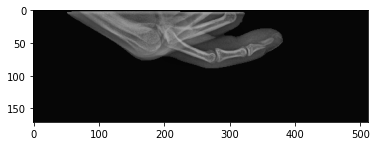

In [ ]:
clahe = cv2.createCLAHE(clipLimit=5, tileGridSize=(7, 7))

gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
clahe_gray = clahe.apply(gray)
bgr = cv2.cvtColor(clahe_gray, cv2.COLOR_GRAY2BGR)
plt.imshow(bgr)
plt.show()

In [ ]:
def create_clahe_imageset(mask_folder = MASK_FOLDER, image_folder = IMAGE_FOLDER, output_folder= OUTPUT_FOLDER ,cl = 5.0, sz = 7):
  clahe = cv2.createCLAHE(clipLimit= cl, tileGridSize=(sz, sz))
  for path in os.listdir(mask_folder):
    mask = cv2.imread(os.path.join(mask_folder, path))
    ret, mask_binary = cv2.threshold(mask,127,1,cv2.THRESH_BINARY)

    image = cv2.imread(os.path.join(image_folder, path[:-3]+"png"))

    output = image * mask_binary
    output = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
    output = clahe.apply(output)
    output = cv2.cvtColor(output, cv2.COLOR_GRAY2BGR)

    save_path = os.path.join(output_folder, path[:-3]+"png")
    cv2.imwrite(save_path, output)

    src_text_path = os.path.join(image_folder, path[:-3]+"txt")
    des_text_path = os.path.join(output_folder, path[:-3]+"txt")
    shutil.copy(src_text_path, des_text_path)

  print ("done")

In [ ]:
create_clahe_imageset()

In [ ]:
MASK_FOLDER = "/content/drive/MyDrive/DAUGXray/DataAug/yolact_val/"
IMAGE_FOLDER = "/content/drive/MyDrive/DAUGXray/DataAug/mura/NEW_MURA_dataset/test/"
OUTPUT_FOLDER = "/content/drive/MyDrive/DAUGXray/DataAug/clahe_val/"
create_clahe_imageset(mask_folder = MASK_FOLDER, image_folder = IMAGE_FOLDER, output_folder= OUTPUT_FOLDER ,cl = 5.0, sz = 7)

done


In [ ]:
print(len(os.listdir("/content/drive/MyDrive/DAUGXray/DataAug/image_train")))